# Explaining Models with Shap

# (Core) Project 1: Global Explanations

## Task
- For this assignment, you will continue revisiting your first project to predict supermarket sales. You will be applying everything you've learned thus far this week to explain how your models made their predictions.

## Project 1 Revisited - Part 2: Global Explanations
Load Your Saved Joblib File
- Create a new notebook for this assignment in your project 1 repository. Name the notebook "Explaining Models with Shap.ipynb"
- In your notebook, load the contents of your "best-models.joblib" file into a variable called "loaded_joblib."
- Save each object from the loaded_joblib dictionary as a separate variable in your notebook. (e.g. "X_train = loaded_joblib['X_train'])

## Explain your tree-based model with shap:
- Create an X_shap and y_shap variable from your training data (use shap.sample as needed).
- Create a model explainer,
- Calculate the shap values for your model.
- Create a summary plot - with plot_type='bar':
    - In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.
        - Are they the same features in both? If not, what's different?
    - Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).
- Create a second summary plot - with plot_type='dot'
    - In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
    - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

## Update your README.
- Insert your exported figures and corresponding interpretations from above into your README file. You should have:
    - a summary plot - bar version
        - Your comparison of most important features found by shap vs feature importance.
    - a summary plot - dot version
        - Your interpretation of the top 3 most important features and how they influence your model's predictions.

**Submit the link to your project repository as your final submission for this assignment.**

In [2]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set text displays for sklearn
from sklearn import set_config
set_config(display='text')
## Using pd.set_option to display more columns
pd.set_option('display.max_columns',50)

In [3]:
import joblib
loaded_joblib = joblib.load('random_forest.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForest'])

In [7]:
X_train = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
RandomForest = loaded_joblib['RandomForest']

In [8]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
7503,-0.740321,-0.167776,-0.115397,-0.285261,-0.293515,3.018928,-0.417297,-0.164795,-0.254908,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,-1.257196,-0.623184,-0.700976,1.235105,0.730976,-0.351809,-0.357121,0.331009,-0.776646,-0.998816
2957,-0.740321,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,-0.417297,-0.164795,3.922976,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,-1.257196,1.604663,-0.700976,-0.809648,0.730976,-0.351809,-0.357121,-1.179892,0.100317,-1.585194
7031,1.350766,-0.167776,-0.115397,3.505564,-0.293515,-0.331243,-0.417297,-0.164795,-0.254908,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,0.795421,-0.623184,-0.700976,-0.809648,0.730976,-0.351809,-0.357121,0.378447,-0.482994,-1.595784


In [9]:
# Modeling - RandomForestRegressor
## fit random forest
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForest
rf_reg.fit(X_train_df,y_train)
print(f"Training R^2: {rf_reg.score(X_train_df,y_train):.3f}")
print(f"Test R^2: {rf_reg.score(X_test_df, y_test):.3f}")

Training R^2: 0.936
Test R^2: 0.538


In [10]:
import shap
shap.initjs()

In [11]:
X_shap = shap.sample(X_train_df, nsamples=200, random_state=321)
X_shap

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
3888,1.350766,-0.167776,-0.115397,-0.285261,-0.293515,3.018928,-0.417297,-0.164795,-0.254908,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,0.795421,-0.623184,1.426583,-0.809648,0.730976,-0.351809,-0.357121,0.698654,0.873252,-1.677139
2497,1.350766,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,2.396376,-0.164795,-0.254908,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,-1.257196,1.604663,-0.700976,-0.809648,0.730976,-0.351809,-0.357121,0.520761,0.418566,1.275305
7723,-0.740321,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,2.396376,-0.164795,-0.254908,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,0.795421,-0.623184,1.426583,-0.809648,0.730976,-0.351809,-0.357121,1.090017,-0.986085,0.684178
8117,-0.740321,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,2.396376,-0.164795,-0.254908,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,0.795421,-0.623184,1.426583,-0.809648,0.730976,-0.351809,-0.357121,-0.499157,-0.316610,1.616527
7475,-0.740321,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,-0.417297,-0.164795,3.922976,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,0.795421,-0.623184,1.426583,-0.809648,0.730976,-0.351809,-0.357121,0.497042,-0.410893,-0.023898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4033,-0.740321,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,2.396376,-0.164795,-0.254908,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,0.795421,-0.623184,-0.700976,1.235105,-1.368035,2.842454,-0.357121,1.647414,-0.394155,-0.237582
3230,1.350766,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,2.396376,-0.164795,-0.254908,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,0.795421,-0.623184,-0.700976,-0.809648,0.730976,-0.351809,-0.357121,-0.879847,1.104864,-0.668730
2341,-0.740321,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,-0.417297,-0.164795,3.922976,-0.349276,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,0.795421,-0.623184,1.426583,-0.809648,0.730976,-0.351809,-0.357121,0.176835,0.228139,-1.387437
823,-0.740321,-0.167776,-0.115397,-0.285261,-0.293515,-0.331243,-0.417297,-0.164795,-0.254908,2.863062,-0.222687,-0.144084,-0.081328,-0.406384,-0.233691,-0.139491,0.795421,-0.623184,-0.700976,1.235105,-1.368035,2.842454,-0.357121,0.544480,-0.631201,-0.494842


In [12]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
4033    1771.0280
3230    1416.8224
2341    1301.6390
823     1856.2504
6159     697.0926
Name: Item_Outlet_Sales, Length: 200, dtype: float64

In [13]:
explainer = shap.Explainer(rf_reg)
explainer

In [14]:
# We will then calculate the shap_values by running the explainer as a function with X_shap and y_shap as the arguments.
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(200, 26)

In [15]:
X_shap.shape

(200, 26)

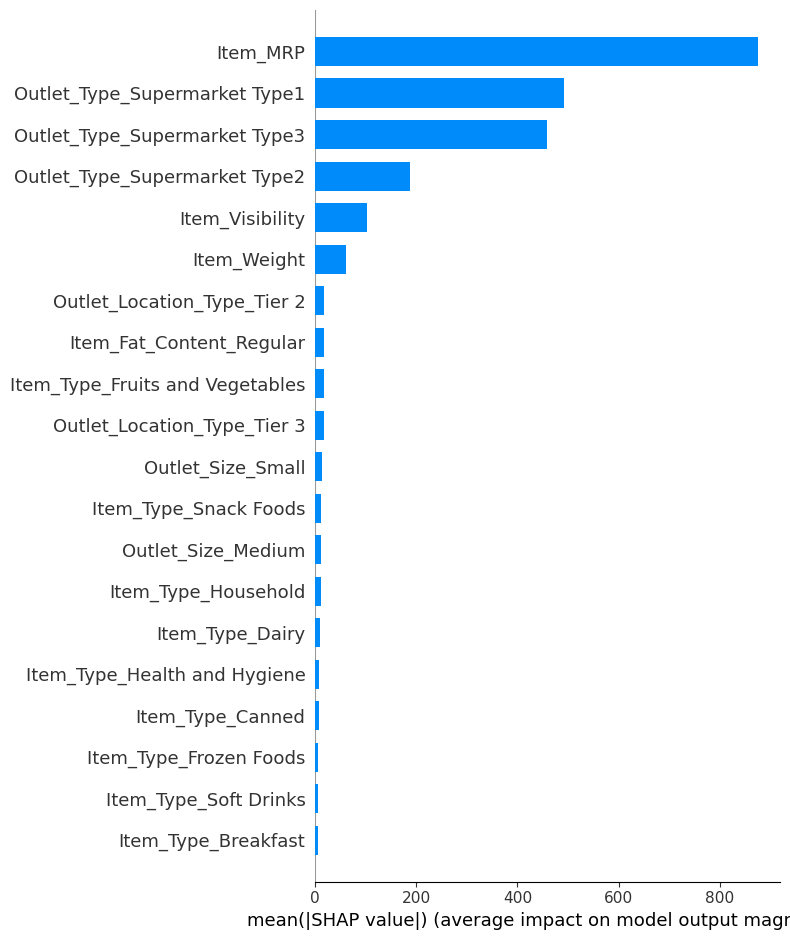

In [23]:
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


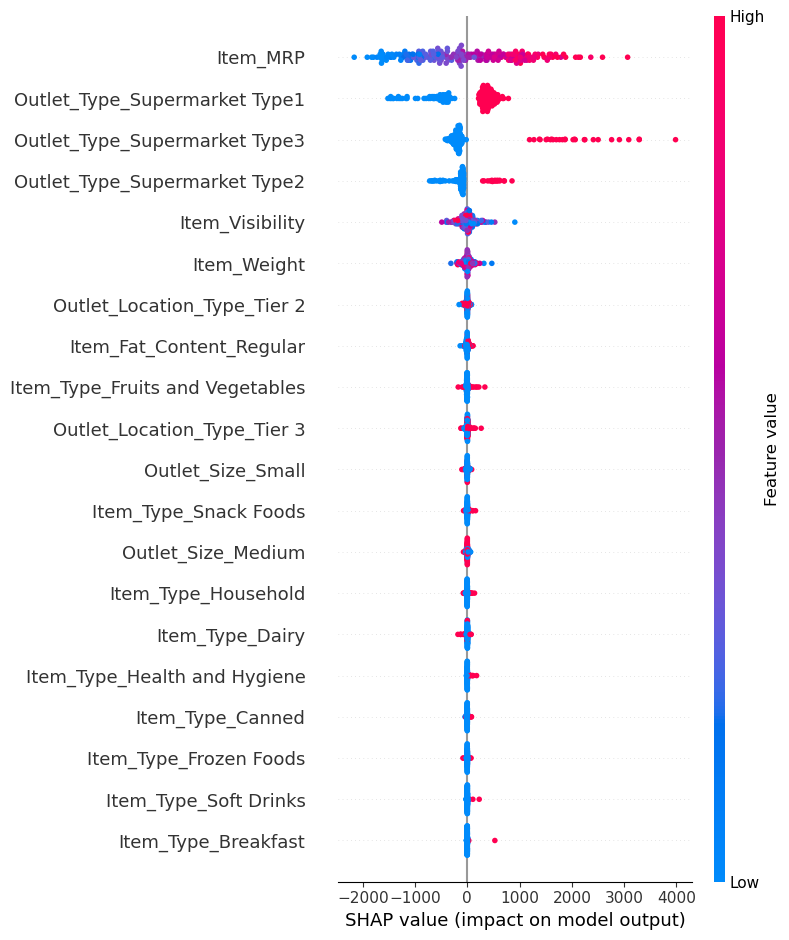

In [16]:
shap.summary_plot(shap_values,X_shap)

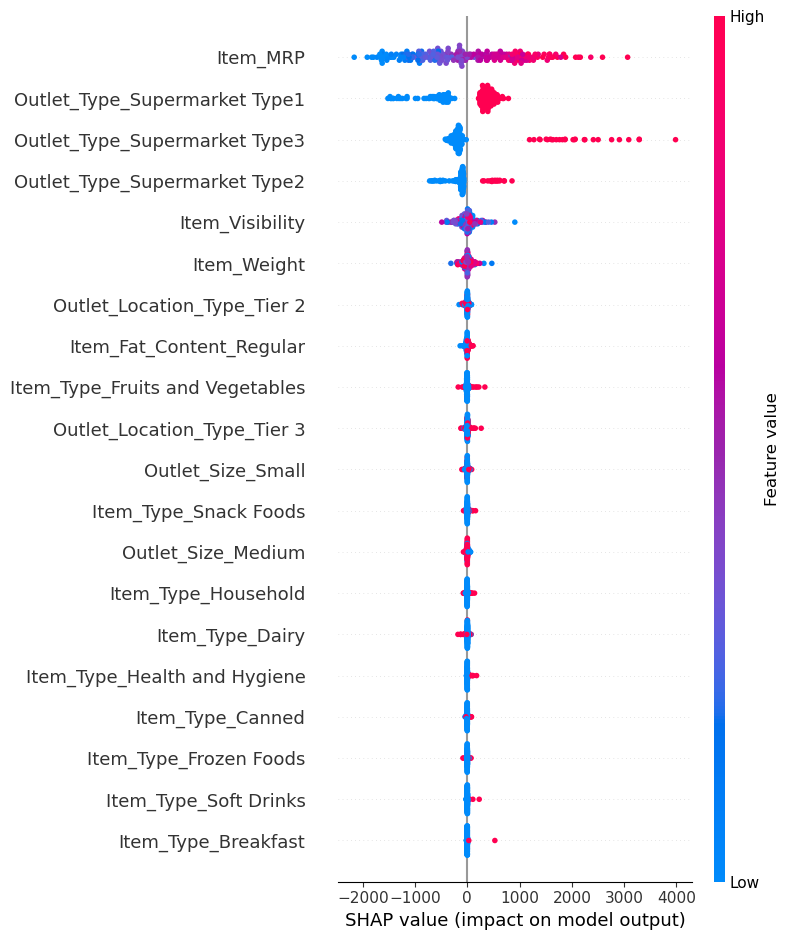

In [19]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values,X_shap)
ax.set_title('Summary Plot');

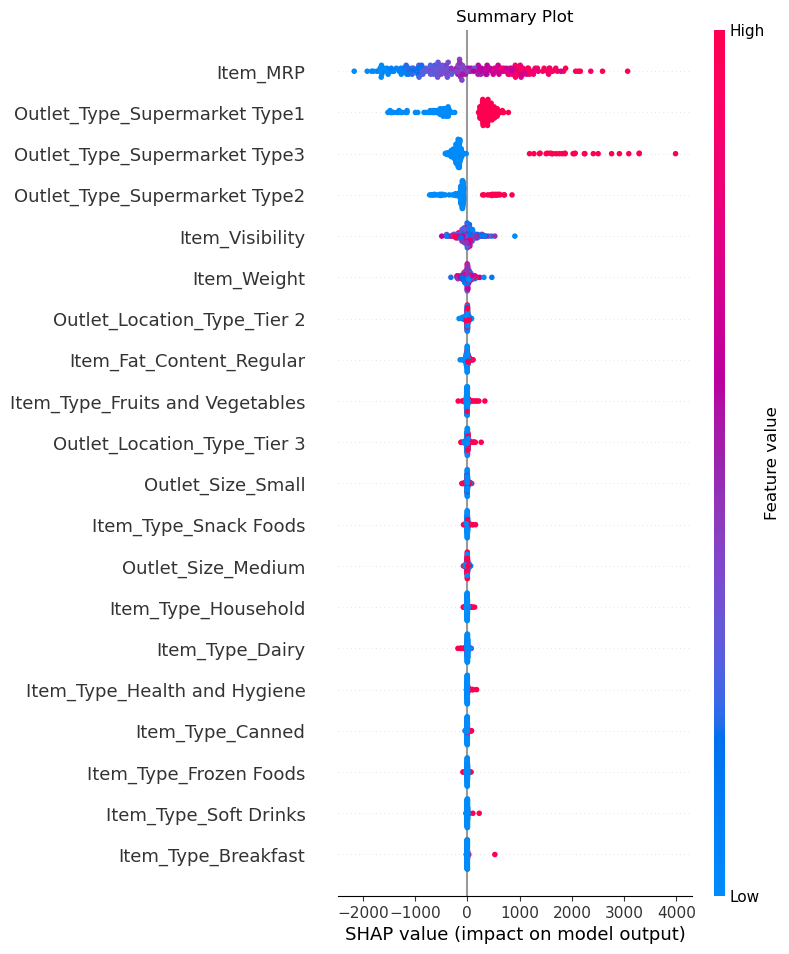

In [21]:
# Using fig.savefig
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, show=False)
ax.set_title('Summary Plot');
fig.savefig('images/summary_plot.png')